# 전처리된 ecg 데이터 변환하기

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 전처리 데이터 확인하기

In [2]:
data = pd.read_pickle('apnea-ecg.pkl')

In [3]:
data.keys()

dict_keys(['o_train', 'y_train', 'groups_train', 'o_test', 'y_test', 'groups_test'])

In [4]:
len(data['o_train']), len(data['y_train']), len(data['groups_train']), len(data['o_test']), len(data['y_test']), len(data['groups_test'])

(16709, 16709, 16709, 16945, 16945, 16945)

1분 동안의 4가지 feature를 가진 데이터 -> 1번의 무호흡 측정

In [5]:
# 첫 번째 참가자의 첫 1분 데이터
data['o_train'][0]

[(array([  1.27,   2.11,   2.94,   3.77,   4.65,   5.59,   6.56,   7.5 ,
           8.43,   9.37,  10.37,  11.39,  12.4 ,  13.39,  14.36,  15.31,
          16.29,  17.3 ,  18.24,  19.14,  20.  ,  20.85,  21.82,  22.75,
          23.68,  24.52,  25.29,  26.06,  26.87,  27.68,  28.52,  29.36,
          30.17,  31.  ,  31.89,  32.89,  33.82,  34.7 ,  35.56,  36.41,
          37.28,  38.17,  39.08,  40.  ,  40.88,  41.85,  42.85,  43.79,
          44.65,  45.47,  46.31,  47.18,  48.06,  48.94,  49.86,  50.76,
          51.66,  52.58,  53.48,  54.38,  55.29,  56.2 ,  57.08,  57.96,
          58.89,  59.79,  60.66,  61.57,  62.46,  63.34,  64.23,  65.07,
          65.9 ,  66.73,  67.65,  68.53,  69.38,  70.22,  71.09,  71.93,
          72.77,  73.63,  74.45,  75.25,  76.05,  76.89,  77.73,  78.55,
          79.33,  80.12,  80.96,  81.82,  82.74,  83.6 ,  84.41,  85.21,
          86.02,  86.87,  87.75,  88.6 ,  89.42,  90.19,  90.93,  91.64,
          92.34,  93.12,  93.95,  94.84,  95.71,  9

In [6]:
# set 순서 유지 함수
def ordered_unique_list(input_list):
    input_dic = {}
    r_list = []
    for i, v in enumerate(input_list):
        get_value = input_dic.get(v, None)
        if get_value == None:
            input_dic[v] = i
            r_list.append(v)
    return r_list

In [7]:
# 첫 번째 참가자의 첫 1분의 첫 번째 feature
print(data['o_train'][0][0][0])

# 첫 번째 참가자의 첫 1분의 두 번째 feature
print(data['o_train'][0][0][1])

# 첫 번째 참가자의 첫 1분의 세 번째 feature
print(data['o_train'][0][1][0])

# 첫 번째 참가자의 첫 1분의 네 번째 feature
print(data['o_train'][0][1][1])

# 첫 번째 참가자의 두번째 1분의 첫 번째 feature
print(data['o_train'][1][0][0])

# 그럼 두 번째 참가자의 리스트는 어디부터??
count = {}
train_participant = ordered_unique_list(data['groups_train'])
for participant in train_participant:
    count[participant] = data['groups_train'].count(participant)

# 참가자와 참가자의 record 수 dictionary
count 

[  1.27   2.11   2.94   3.77   4.65   5.59   6.56   7.5    8.43   9.37
  10.37  11.39  12.4   13.39  14.36  15.31  16.29  17.3   18.24  19.14
  20.    20.85  21.82  22.75  23.68  24.52  25.29  26.06  26.87  27.68
  28.52  29.36  30.17  31.    31.89  32.89  33.82  34.7   35.56  36.41
  37.28  38.17  39.08  40.    40.88  41.85  42.85  43.79  44.65  45.47
  46.31  47.18  48.06  48.94  49.86  50.76  51.66  52.58  53.48  54.38
  55.29  56.2   57.08  57.96  58.89  59.79  60.66  61.57  62.46  63.34
  64.23  65.07  65.9   66.73  67.65  68.53  69.38  70.22  71.09  71.93
  72.77  73.63  74.45  75.25  76.05  76.89  77.73  78.55  79.33  80.12
  80.96  81.82  82.74  83.6   84.41  85.21  86.02  86.87  87.75  88.6
  89.42  90.19  90.93  91.64  92.34  93.12  93.95  94.84  95.71  96.55
  97.38  98.21  99.04  99.84 100.63 101.41 102.28 103.13 104.01 104.81
 105.6  106.47 107.39 108.27 109.12 109.95 110.8  111.72 112.66 113.55
 114.4  115.22 116.05 116.9  117.75 118.56 119.37 120.27 121.19 122.06
 122.89

{'a01': 487,
 'a03': 516,
 'a02': 520,
 'a05': 449,
 'a04': 490,
 'a06': 505,
 'a07': 506,
 'a08': 496,
 'a09': 493,
 'a10': 512,
 'a11': 464,
 'a12': 563,
 'a13': 490,
 'a14': 507,
 'a15': 505,
 'a16': 477,
 'a17': 466,
 'a18': 487,
 'a19': 498,
 'a20': 505,
 'b01': 482,
 'b02': 515,
 'b03': 436,
 'b04': 403,
 'b05': 390,
 'c01': 469,
 'c03': 449,
 'c02': 482,
 'c04': 455,
 'c05': 461,
 'c06': 463,
 'c07': 418,
 'c08': 486,
 'c09': 450,
 'c10': 414}

In [8]:
# 참가자 이름
keys = list(count.keys())

## 데이터 변환하기

In [9]:
# 데이터프레임 만들기
train_df = pd.DataFrame(index=range(len(data['o_train'])), columns={'name', 'f1', 'f2', 'class'})
train_df = train_df[['name', 'f1', 'f2', 'class']]
train_df

,name,f1,f2,class
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
16704,NaN,NaN,NaN,NaN
16705,NaN,NaN,NaN,NaN
16706,NaN,NaN,NaN,NaN
16707,NaN,NaN,NaN,NaN


In [10]:
# 데이터프레임에 값 채우기

# 이름
train_df['name'] = data['groups_train']


# 두 번째 feature
for i in range(len(data['o_train'])):
    train_df['f1'][i] = data['o_train'][i][0][1]
    
# 네 번째 feature
for i in range(len(data['o_train'])):
    train_df['f2'][i] = data['o_train'][i][1][1]

# class
for i in range(len(data['y_train'])):
    train_df['class'][i] = data['y_train'][i]

In [11]:
train_df

,name,f1,f2,class
0,a01,"[0.84, 0.84, 0.83, 0.83, 0.88, 0.94, 0.94, 0.9...","[1.3939650223712827, 1.1507840369251976, 1.177...",0.0
1,a01,"[0.89, 0.89, 0.89, 0.88, 0.84, 0.83, 0.83, 0.8...","[1.5820983886552438, 1.4577049292839148, 1.566...",0.0
2,a01,"[0.87, 0.87, 0.87, 0.88, 0.92, 0.92, 0.92, 0.9...","[1.6091985996917988, 1.4485325182626976, 1.287...",0.0
3,a01,"[0.74, 0.75, 0.81, 0.83, 0.83, 0.79, 0.78, 0.7...","[1.710671715852051, 1.565768997362596, 1.52468...",0.0
4,a01,"[0.8, 0.8, 0.8, 0.8, 0.81, 0.81, 0.8, 0.79, 0....","[1.5095510183723007, 1.4358356013856985, 1.202...",0.0
...,...,...,...,...
16704,c10,"[1.02, 1.02, 0.98, 0.93, 0.93, 0.96, 0.96, 0.9...","[0.7229669719791096, 0.712199922729979, 0.8128...",0.0
16705,c10,"[1.01, 1.03, 1.03, 1.04, 1.08, 1.08, 1.09, 1.0...","[0.7442973637232569, 0.7308784047464841, 0.667...",0.0
16706,c10,"[1.12, 1.13, 1.14, 1.14, 1.09, 1.05, 1.05, 1.1...","[0.7710773156549249, 0.786968294405137, 0.7582...",0.0
16707,c10,"[1.04, 1.04, 1.04, 1.14, 1.14, 1.13, 1.13, 1.1...","[0.913615451991043, 0.8074207647261056, 0.8124...",0.0


In [12]:
# 마찬가지로 test set 데이터프레임도 만들기

test_df = pd.DataFrame(index=range(len(data['o_test'])), columns={'name', 'f1', 'f2', 'class'})
test_df = test_df[['name', 'f1', 'f2', 'class']]

# 데이터프레임에 값 채우기

# 이름
test_df['name'] = data['groups_test']


# 두 번째 feature
for i in range(len(data['o_test'])):
    test_df['f1'][i] = data['o_test'][i][0][1]
    
    
# 네 번째 feature
for i in range(len(data['o_test'])):
    test_df['f2'][i] = data['o_test'][i][1][1]

# class
for i in range(len(data['y_test'])):
    test_df['class'][i] = data['y_test'][i]

In [13]:
test_df

,name,f1,f2,class
0,x03,"[0.81, 0.81, 0.81, 1.05, 1.05, 1.02, 0.99, 1.0...","[1.8624308287797091, 1.7770034490614268, 1.718...",0.0
1,x03,"[0.81, 0.88, 0.88, 0.96, 1.18, 1.18, 1.13, 1.1...","[1.9100716759142604, 1.9345162505680367, 1.917...",0.0
2,x03,"[1.1, 1.17, 1.17, 1.08, 1.08, 1.08, 1.1, 1.1, ...","[1.7336898810598507, 1.6974785428595836, 1.958...",0.0
3,x03,"[0.98, 0.98, 1.0, 1.13, 1.13, 1.09, 1.07, 1.02...","[1.9746800788409251, 1.7938170163619518, 1.867...",0.0
4,x03,"[1.14, 1.14, 1.1, 1.01, 0.99, 0.98, 0.99, 0.99...","[1.9470686834026194, 2.0084933169401356, 1.914...",0.0
...,...,...,...,...
16940,x35,"[1.07, 1.07, 0.94, 0.85, 0.83, 0.83, 0.86, 0.8...","[0.9651859490405794, 0.9833208508820604, 0.988...",0.0
16941,x35,"[0.9, 0.93, 1.2, 1.2, 1.19, 1.15, 1.15, 1.15, ...","[1.0573832534755199, 1.074344954886743, 1.1235...",0.0
16942,x35,"[1.15, 1.17, 1.17, 1.14, 1.12, 1.12, 1.15, 1.1...","[0.8913762389076602, 1.128274723452361, 1.2113...",0.0
16943,x35,"[0.99, 1.18, 1.18, 1.15, 1.14, 1.13, 1.07, 0.9...","[1.1623385481952382, 1.1686027820073956, 0.856...",0.0


## 기술통계량 구하기 

In [14]:
# train data의 기술통계량 초기화
train_df[['f1_mean', 'f1_max', 'f1_min', 'f1_median', 'f1_std', 'f1_skewness', 'f1_kurtosis', 'f1_cutting avg', 'f1_mode', 'f1_Q1', 'f1_Q3']] = ''
train_df[['f2_mean', 'f2_max', 'f2_min', 'f2_median', 'f2_std', 'f2_skewness', 'f2_kurtosis', 'f2_cutting avg', 'f2_mode', 'f2_Q1', 'f2_Q3']] = ''

In [15]:
# test data의 기술통계량 초기화
test_df[['f1_mean', 'f1_max', 'f1_min', 'f1_median', 'f1_std', 'f1_skewness', 'f1_kurtosis', 'f1_cutting avg', 'f1_mode', 'f1_Q1', 'f1_Q3']] = ''
test_df[['f2_mean', 'f2_max', 'f2_min', 'f2_median', 'f2_std', 'f2_skewness', 'f2_kurtosis', 'f2_cutting avg', 'f2_mode', 'f2_Q1', 'f2_Q3']] = ''

In [16]:
from scipy.stats import skew, kurtosis
from scipy import stats
import statistics as st

for i in range(len(train_df)):
    train_df['f1_mean'][i] = np.mean(train_df['f1'][i]) # 평균
    train_df['f1_max'][i] = max(train_df['f1'][i]) # 최대값
    train_df['f1_min'][i] = min(train_df['f1'][i]) # 최소값
    train_df['f1_median'][i] = np.median(train_df['f1'][i]) # 중앙값
    train_df['f1_std'][i] = np.std(train_df['f1'][i]) # 표준편차
    train_df['f1_skewness'][i] = skew(train_df['f1'][i]) # 왜도
    train_df['f1_kurtosis'][i] = kurtosis(train_df['f1'][i], fisher=True) # 첨도
    train_df['f1_cutting avg'][i] = stats.trim_mean(train_df['f1'][i], 0.1) # 절사평균
    train_df['f1_mode'][i] = st.mode(train_df['f1'][i]) # 최빈값
    train_df['f1_Q1'][i] = np.percentile(train_df['f1'][i], 25) # 25% 분위수
    train_df['f1_Q3'][i] = np.percentile(train_df['f1'][i], 75) # 75% 분위수
    
    train_df['f2_mean'][i] = np.mean(train_df['f2'][i]) # 평균
    train_df['f2_max'][i] = max(train_df['f2'][i]) # 최대값
    train_df['f2_min'][i] = min(train_df['f2'][i]) # 최소값
    train_df['f2_median'][i] = np.median(train_df['f2'][i]) # 중앙값
    train_df['f2_std'][i] = np.std(train_df['f2'][i]) # 표준편차
    train_df['f2_skewness'][i] = skew(train_df['f2'][i]) # 왜도
    train_df['f2_kurtosis'][i] = kurtosis(train_df['f2'][i], fisher=True) # 첨도
    train_df['f2_cutting avg'][i] = stats.trim_mean(train_df['f2'][i], 0.1) # 절사평균
    train_df['f2_mode'][i] = st.mode(train_df['f2'][i]) # 최빈값
    train_df['f2_Q1'][i] = np.percentile(train_df['f2'][i], 25) # 25% 분위수
    train_df['f2_Q3'][i] = np.percentile(train_df['f2'][i], 75) # 75% 분위수

In [17]:
train_df

,name,f1,f2,class,f1_mean,f1_max,f1_min,f1_median,f1_std,f1_skewness,...,f2_max,f2_min,f2_median,f2_std,f2_skewness,f2_kurtosis,f2_cutting avg,f2_mode,f2_Q1,f2_Q3
0,a01,"[0.84, 0.84, 0.83, 0.83, 0.88, 0.94, 0.94, 0.9...","[1.3939650223712827, 1.1507840369251976, 1.177...",0.0,0.814605,1.01,0.61,0.81,0.074606,-0.083862,...,1.729815,1.038249,1.406768,0.130053,-0.208602,-0.509428,1.404765,1.393965,1.309596,1.499783
1,a01,"[0.89, 0.89, 0.89, 0.88, 0.84, 0.83, 0.83, 0.8...","[1.5820983886552438, 1.4577049292839148, 1.566...",0.0,0.802554,0.92,0.61,0.8,0.064659,-0.411568,...,1.729815,1.038249,1.40381,0.132539,-0.175731,-0.543415,1.400518,1.582098,1.306423,1.496111
2,a01,"[0.87, 0.87, 0.87, 0.88, 0.92, 0.92, 0.92, 0.9...","[1.6091985996917988, 1.4485325182626976, 1.287...",0.0,0.79869,0.93,0.61,0.8,0.063403,-0.28231,...,1.729815,1.038249,1.391431,0.139122,-0.101161,-0.651908,1.387918,1.609199,1.285908,1.491064
3,a01,"[0.74, 0.75, 0.81, 0.83, 0.83, 0.79, 0.78, 0.7...","[1.710671715852051, 1.565768997362596, 1.52468...",0.0,0.780261,0.93,0.61,0.79,0.063673,-0.207427,...,1.729815,1.038249,1.37588,0.138831,-0.060768,-0.564344,1.375485,1.710672,1.271209,1.476831
4,a01,"[0.8, 0.8, 0.8, 0.8, 0.81, 0.81, 0.8, 0.79, 0....","[1.5095510183723007, 1.4358356013856985, 1.202...",0.0,0.772429,0.93,0.63,0.78,0.069808,-0.089447,...,1.696351,0.688753,1.355556,0.159082,-0.350333,0.140886,1.347923,1.509551,1.216013,1.466235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,c10,"[1.02, 1.02, 0.98, 0.93, 0.93, 0.96, 0.96, 0.9...","[0.7229669719791096, 0.712199922729979, 0.8128...",0.0,0.996221,1.17,0.66,1.04,0.138827,-0.999999,...,1.102178,0.43611,0.754743,0.087461,-0.235664,1.722489,0.754802,0.722967,0.702341,0.807497
16705,c10,"[1.01, 1.03, 1.03, 1.04, 1.08, 1.08, 1.09, 1.0...","[0.7442973637232569, 0.7308784047464841, 0.667...",0.0,0.969123,1.17,0.66,1.0,0.145888,-0.574507,...,1.150589,0.43611,0.752928,0.099103,0.288874,1.91715,0.758096,0.744297,0.702439,0.814431
16706,c10,"[1.12, 1.13, 1.14, 1.14, 1.09, 1.05, 1.05, 1.1...","[0.7710773156549249, 0.786968294405137, 0.7582...",0.0,0.975359,1.17,0.66,1.01,0.146216,-0.672804,...,1.150589,0.43611,0.754598,0.098147,0.291809,2.109993,0.757809,0.771077,0.704821,0.809558
16707,c10,"[1.04, 1.04, 1.04, 1.14, 1.14, 1.13, 1.13, 1.1...","[0.913615451991043, 0.8074207647261056, 0.8124...",0.0,0.98523,1.17,0.66,1.05,0.146976,-0.849156,...,1.150589,0.43611,0.754565,0.096848,0.267417,2.341946,0.758323,0.913615,0.709505,0.812414


In [18]:
for i in range(len(test_df)):
    test_df['f1_mean'][i] = np.mean(test_df['f1'][i]) # 평균
    test_df['f1_max'][i] = max(test_df['f1'][i]) # 최대값
    test_df['f1_min'][i] = min(test_df['f1'][i]) # 최소값
    test_df['f1_median'][i] = np.median(test_df['f1'][i]) # 중앙값
    test_df['f1_std'][i] = np.std(test_df['f1'][i]) # 표준편차
    test_df['f1_skewness'][i] = skew(test_df['f1'][i]) # 왜도
    test_df['f1_kurtosis'][i] = kurtosis(test_df['f1'][i], fisher=True) # 첨도
    test_df['f1_cutting avg'][i] = stats.trim_mean(test_df['f1'][i], 0.1) # 절사평균
    test_df['f1_mode'][i] = st.mode(test_df['f1'][i]) # 최빈값
    test_df['f1_Q1'][i] = np.percentile(test_df['f1'][i], 25) # 25% 분위수
    test_df['f1_Q3'][i] = np.percentile(test_df['f1'][i], 75) # 75% 분위수
    
    test_df['f2_mean'][i] = np.mean(test_df['f2'][i]) # 평균
    test_df['f2_max'][i] = max(test_df['f2'][i]) # 최대값
    test_df['f2_min'][i] = min(test_df['f2'][i]) # 최소값
    test_df['f2_median'][i] = np.median(test_df['f2'][i]) # 중앙값
    test_df['f2_std'][i] = np.std(test_df['f2'][i]) # 표준편차
    test_df['f2_skewness'][i] = skew(test_df['f2'][i]) # 왜도
    test_df['f2_kurtosis'][i] = kurtosis(test_df['f2'][i], fisher=True) # 첨도
    test_df['f2_cutting avg'][i] = stats.trim_mean(test_df['f2'][i], 0.1) # 절사평균
    test_df['f2_mode'][i] = st.mode(test_df['f2'][i]) # 최빈값
    test_df['f2_Q1'][i] = np.percentile(test_df['f2'][i], 25) # 25% 분위수
    test_df['f2_Q3'][i] = np.percentile(test_df['f2'][i], 75) # 75% 분위수

In [19]:
test_df

,name,f1,f2,class,f1_mean,f1_max,f1_min,f1_median,f1_std,f1_skewness,...,f2_max,f2_min,f2_median,f2_std,f2_skewness,f2_kurtosis,f2_cutting avg,f2_mode,f2_Q1,f2_Q3
0,x03,"[0.81, 0.81, 0.81, 1.05, 1.05, 1.02, 0.99, 1.0...","[1.8624308287797091, 1.7770034490614268, 1.718...",0.0,1.022708,1.35,0.54,1.025,0.100776,-0.998396,...,6.509689,1.079011,1.921249,0.336785,9.474222,121.612523,1.8998,1.862431,1.805196,1.976459
1,x03,"[0.81, 0.88, 0.88, 0.96, 1.18, 1.18, 1.13, 1.1...","[1.9100716759142604, 1.9345162505680367, 1.917...",0.0,0.987267,1.35,0.47,0.99,0.129223,-0.944516,...,6.509689,1.079011,1.918589,0.333362,9.36987,121.414844,1.901307,1.910072,1.812548,1.982123
2,x03,"[1.1, 1.17, 1.17, 1.08, 1.08, 1.08, 1.1, 1.1, ...","[1.7336898810598507, 1.6974785428595836, 1.958...",0.0,0.966234,1.17,0.31,0.97,0.129813,-1.564866,...,3.84147,1.128567,1.914543,0.227738,4.491447,37.063007,1.899468,1.73369,1.81038,1.983184
3,x03,"[0.98, 0.98, 1.0, 1.13, 1.13, 1.09, 1.07, 1.02...","[1.9746800788409251, 1.7938170163619518, 1.867...",0.0,0.946667,1.17,0.31,0.95,0.124472,-1.622869,...,3.84147,1.128567,1.930279,0.25111,4.311532,31.207795,1.921672,1.97468,1.822964,2.010086
4,x03,"[1.14, 1.14, 1.1, 1.01, 0.99, 0.98, 0.99, 0.99...","[1.9470686834026194, 2.0084933169401356, 1.914...",0.0,0.920432,1.16,0.31,0.94,0.122454,-1.392077,...,3.84147,1.128567,1.944888,0.266696,3.373506,22.011446,1.941781,1.947069,1.824777,2.054926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16940,x35,"[1.07, 1.07, 0.94, 0.85, 0.83, 0.83, 0.86, 0.8...","[0.9651859490405794, 0.9833208508820604, 0.988...",0.0,1.020034,1.22,0.46,1.09,0.1669,-0.977416,...,1.293926,0.543779,1.079813,0.129736,-0.53185,-0.332527,1.068279,0.965186,0.962539,1.174864
16941,x35,"[0.9, 0.93, 1.2, 1.2, 1.19, 1.15, 1.15, 1.15, ...","[1.0573832534755199, 1.074344954886743, 1.1235...",0.0,1.037569,1.22,0.39,1.09,0.152367,-1.288419,...,1.260851,0.698028,1.095823,0.125515,-0.397937,-0.984033,1.073127,1.057383,0.974488,1.176732
16942,x35,"[1.15, 1.17, 1.17, 1.14, 1.12, 1.12, 1.15, 1.1...","[0.8913762389076602, 1.128274723452361, 1.2113...",0.0,0.918129,1.22,0.29,0.97,0.218811,-0.557359,...,2.34039,0.529279,1.097024,0.156877,1.144701,12.29494,1.072712,0.891376,0.962708,1.181461
16943,x35,"[0.99, 1.18, 1.18, 1.15, 1.14, 1.13, 1.07, 0.9...","[1.1623385481952382, 1.1686027820073956, 0.856...",0.0,0.835882,1.22,0.29,0.77,0.213539,0.128498,...,2.34039,0.458909,1.099202,0.164847,0.799563,9.518186,1.075723,1.162339,0.95884,1.184644


In [20]:
# 기존 데이터 삭제
train_df.drop(['f1', 'f2'], axis=1, inplace=True)
test_df.drop(['f1', 'f2'], axis=1, inplace=True)

In [21]:
# CSV 변환
train_df.to_csv('train_data.csv')
test_df.to_csv('test_data.csv')

In [256]:
# numeric value로 변환
train_df = train_df.apply(pd.to_numeric, errors='coerce')
test_df = test_df.apply(pd.to_numeric, errors='coerce')

# 모델링

In [22]:
train_df = pd.read_csv('train_data.csv', index_col=0)
test_df = pd.read_csv('test_data.csv', index_col=0)

In [25]:
train_df

,name,class,f1_mean,f1_max,f1_min,f1_median,f1_std,f1_skewness,f1_kurtosis,f1_cutting avg,...,f2_max,f2_min,f2_median,f2_std,f2_skewness,f2_kurtosis,f2_cutting avg,f2_mode,f2_Q1,f2_Q3
0,a01,0.0,0.814605,1.01,0.61,0.81,0.074606,-0.083862,-0.031381,0.815220,...,1.729815,1.038249,1.406768,0.130053,-0.208602,-0.509428,1.404765,1.393965,1.309596,1.499783
1,a01,0.0,0.802554,0.92,0.61,0.80,0.064659,-0.411568,-0.001143,0.804933,...,1.729815,1.038249,1.403810,0.132539,-0.175731,-0.543415,1.400518,1.582098,1.306423,1.496111
2,a01,0.0,0.798690,0.93,0.61,0.80,0.063403,-0.282310,0.108762,0.799933,...,1.729815,1.038249,1.391431,0.139122,-0.101161,-0.651908,1.387918,1.609199,1.285908,1.491064
3,a01,0.0,0.780261,0.93,0.61,0.79,0.063673,-0.207427,-0.202031,0.781531,...,1.729815,1.038249,1.375880,0.138831,-0.060768,-0.564344,1.375485,1.710672,1.271209,1.476831
4,a01,0.0,0.772429,0.93,0.63,0.78,0.069808,-0.089447,-0.714385,0.773023,...,1.696351,0.688753,1.355556,0.159082,-0.350333,0.140886,1.347923,1.509551,1.216013,1.466235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,c10,0.0,0.996221,1.17,0.66,1.04,0.138827,-0.999999,-0.128562,1.013651,...,1.102178,0.436110,0.754743,0.087461,-0.235664,1.722489,0.754802,0.722967,0.702341,0.807497
16705,c10,0.0,0.969123,1.17,0.66,1.00,0.145888,-0.574507,-0.883659,0.980444,...,1.150589,0.436110,0.752928,0.099103,0.288874,1.917150,0.758096,0.744297,0.702439,0.814431
16706,c10,0.0,0.975359,1.17,0.66,1.01,0.146216,-0.672804,-0.794476,0.988577,...,1.150589,0.436110,0.754598,0.098147,0.291809,2.109993,0.757809,0.771077,0.704821,0.809558
16707,c10,0.0,0.985230,1.17,0.66,1.05,0.146976,-0.849156,-0.641127,1.001230,...,1.150589,0.436110,0.754565,0.096848,0.267417,2.341946,0.758323,0.913615,0.709505,0.812414


In [77]:
X_train = train_df.loc[:, 'f1_mean':]
y_train = train_df['class']

X_test = test_df.loc[:, 'f1_mean':]
y_test = test_df['class']

In [78]:
X_train

,f1_mean,f1_max,f1_min,f1_median,f1_std,f1_skewness,f1_kurtosis,f1_cutting avg,f1_mode,f1_Q1,...,f2_max,f2_min,f2_median,f2_std,f2_skewness,f2_kurtosis,f2_cutting avg,f2_mode,f2_Q1,f2_Q3
0,0.814605,1.01,0.61,0.81,0.074606,-0.083862,-0.031381,0.815220,0.83,0.7700,...,1.729815,1.038249,1.406768,0.130053,-0.208602,-0.509428,1.404765,1.393965,1.309596,1.499783
1,0.802554,0.92,0.61,0.80,0.064659,-0.411568,-0.001143,0.804933,0.83,0.7600,...,1.729815,1.038249,1.403810,0.132539,-0.175731,-0.543415,1.400518,1.582098,1.306423,1.496111
2,0.798690,0.93,0.61,0.80,0.063403,-0.282310,0.108762,0.799933,0.80,0.7600,...,1.729815,1.038249,1.391431,0.139122,-0.101161,-0.651908,1.387918,1.609199,1.285908,1.491064
3,0.780261,0.93,0.61,0.79,0.063673,-0.207427,-0.202031,0.781531,0.80,0.7400,...,1.729815,1.038249,1.375880,0.138831,-0.060768,-0.564344,1.375485,1.710672,1.271209,1.476831
4,0.772429,0.93,0.63,0.78,0.069808,-0.089447,-0.714385,0.773023,0.80,0.7200,...,1.696351,0.688753,1.355556,0.159082,-0.350333,0.140886,1.347923,1.509551,1.216013,1.466235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,0.996221,1.17,0.66,1.04,0.138827,-0.999999,-0.128562,1.013651,1.10,0.9300,...,1.102178,0.436110,0.754743,0.087461,-0.235664,1.722489,0.754802,0.722967,0.702341,0.807497
16705,0.969123,1.17,0.66,1.00,0.145888,-0.574507,-0.883659,0.980444,1.10,0.8600,...,1.150589,0.436110,0.752928,0.099103,0.288874,1.917150,0.758096,0.744297,0.702439,0.814431
16706,0.975359,1.17,0.66,1.01,0.146216,-0.672804,-0.794476,0.988577,1.08,0.8825,...,1.150589,0.436110,0.754598,0.098147,0.291809,2.109993,0.757809,0.771077,0.704821,0.809558
16707,0.985230,1.17,0.66,1.05,0.146976,-0.849156,-0.641127,1.001230,1.08,0.9100,...,1.150589,0.436110,0.754565,0.096848,0.267417,2.341946,0.758323,0.913615,0.709505,0.812414


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Decision Tree

### 하이퍼파라미터 튜닝 전

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
# 하이퍼파라미터 튜닝 없이 모델링
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [82]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8055 2400]
 [2685 3805]]


In [83]:
print('Training set score: {:.4f}'.format(tree_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(tree_model.score(X_test, y_test)))
print('accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred))) 
# 위 2개가 같은 것 확인

print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))

Training set score: 1.0000
Test set score: 0.6999
accuracy: 0.6999
precision: 0.6132
recall: 0.5863
f1_score: 0.5994


### 하이퍼파라미터 튜닝 후

In [84]:
# 파라미터 설정
param_dist = {
    'criterion':['gini','entropy'], 
    'max_depth':[None,2,3,4,5], 
    'max_leaf_nodes':[None,2,3,4,5,6,7,8], 
    'min_samples_split':[2,3,4,5,6], 
    'min_samples_leaf':[1,2,3], 
    'max_features':[None,'sqrt','log2',3,4,5,6]
    }

In [85]:
# 모델 학습
tree_model = DecisionTreeClassifier(random_state=0)
rand_search = RandomizedSearchCV(tree_model, param_distributions = param_dist, n_iter = 100, cv = 5, scoring = 'accuracy', refit=True)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         3, 4, 5, 6],
                                        'max_leaf_nodes': [None, 2, 3, 4, 5, 6,
                                                           7, 8],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   scoring='accuracy')

In [86]:
print('best parameters : ', rand_search.best_params_)
print('best score : ', round(rand_search.best_score_, 4))

best parameters :  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 4, 'criterion': 'gini'}
best score :  0.6852


In [87]:
estimator = rand_search.best_estimator_
y_pred = estimator.predict(X_test)
print('Training set score: {:.4f}'.format(estimator.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(estimator.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.7732
Test set score: 0.6463
precision: 0.5368
recall: 0.5584
f1_score: 0.5474
roc auc score: 0.6297


In [88]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[7328 3127]
 [2866 3624]]
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71     10455
         1.0       0.54      0.56      0.55      6490

    accuracy                           0.65     16945
   macro avg       0.63      0.63      0.63     16945
weighted avg       0.65      0.65      0.65     16945



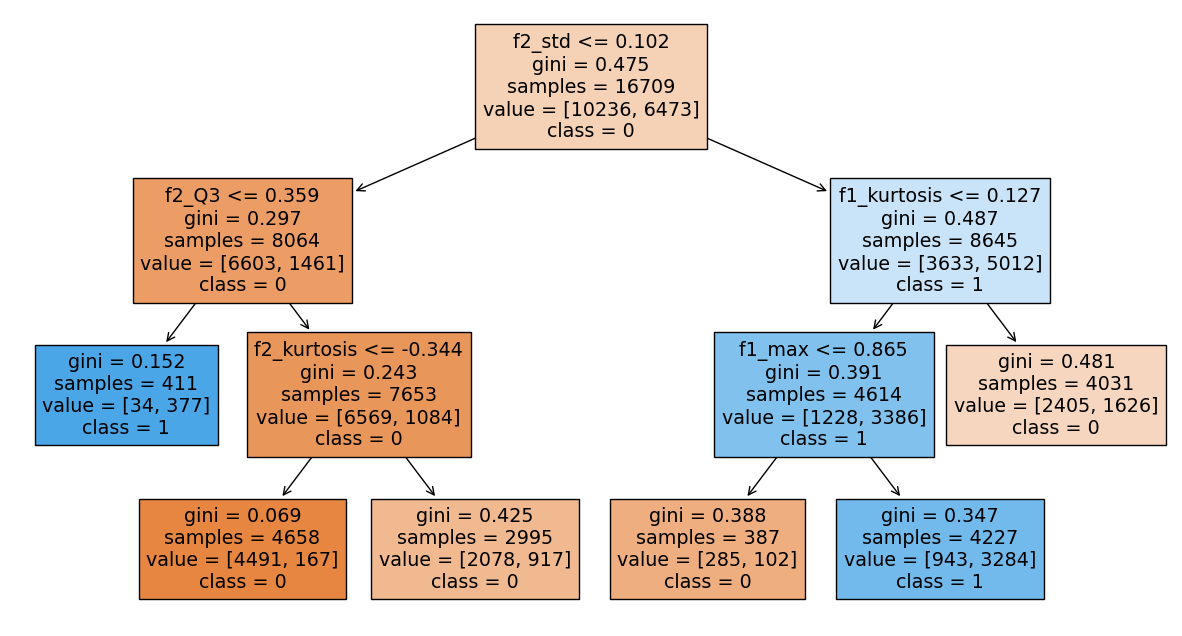

In [89]:
from sklearn import tree

## Plot Tree with plot_tree
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(estimator,
                   feature_names=X_train.columns,
                   class_names=['0', '1'],
                   filled=True)

## Logistic Regression

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

C_list = [0.001, 0.01, 0.1, 1, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]
for C in C_list:
    lr_model = LogisticRegression(C=C, max_iter=10000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    print(f'C : {C}')
    print('Training set score: {:.4f}'.format(lr_model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(lr_model.score(X_test, y_test)))

C : 0.001
Training set score: 0.7198
Test set score: 0.7571
C : 0.01
Training set score: 0.7300
Test set score: 0.7678
C : 0.1
Training set score: 0.7322
Test set score: 0.7690
C : 1
Training set score: 0.7407
Test set score: 0.7747
C : 10
Training set score: 0.7485
Test set score: 0.7770
C : 50
Training set score: 0.7501
Test set score: 0.7778
C : 100
Training set score: 0.7501
Test set score: 0.7779
C : 500
Training set score: 0.7500
Test set score: 0.7777
C : 1000
Training set score: 0.7503
Test set score: 0.7780
C : 2000
Training set score: 0.7503
Test set score: 0.7778
C : 5000
Training set score: 0.7504
Test set score: 0.7782
C : 10000
Training set score: 0.7502
Test set score: 0.7780
C : 20000
Training set score: 0.7507
Test set score: 0.7778


In [114]:
# C = 5000으로 다시 모델링
lr_model = LogisticRegression(C=5000, max_iter=20000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [115]:
print('Training set score: {:.4f}'.format(lr_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr_model.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.7504
Test set score: 0.7782
precision: 0.7487
recall: 0.6334
f1_score: 0.6863
roc auc score: 0.7507


In [116]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[9075 1380]
 [2379 4111]]


In [117]:
print(lr_model.coef_)

[[ 20.86959895  -1.04858595   0.65629513   4.75956583   0.93928195
   -0.77395391  -0.31803455 -26.62310509   0.27758467  -0.75040246
    1.6189718    2.79359035  -1.41165946  -0.60819365   0.7093513
    1.82327105   1.02466755  -0.77508033   2.79795157  -0.17688623
    3.59711488  -8.83231371]]


In [113]:
train_df.columns

Index(['name', 'class', 'f1_mean', 'f1_max', 'f1_min', 'f1_median', 'f1_std',
       'f1_skewness', 'f1_kurtosis', 'f1_cutting avg', 'f1_mode', 'f1_Q1',
       'f1_Q3', 'f2_mean', 'f2_max', 'f2_min', 'f2_median', 'f2_std',
       'f2_skewness', 'f2_kurtosis', 'f2_cutting avg', 'f2_mode', 'f2_Q1',
       'f2_Q3'],
      dtype='object')

## K-Nearest Neighbor

### 하이퍼파라미터 튜닝 전

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델링
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
print('Training set score: {:.4f}'.format(knn_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_model.score(X_test, y_test)))

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training set score: 0.9582


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set score: 0.7704


### 하이퍼파라미터 튜닝 이후

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

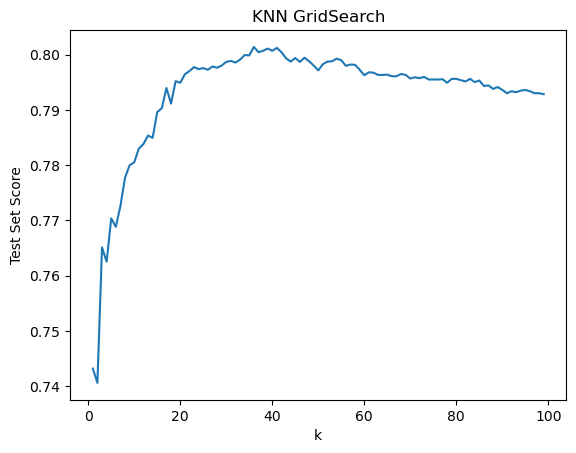

In [57]:
# GridSearch
k_list = range(1,100)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Set Score")
plt.title("KNN GridSearch")
plt.show()

In [63]:
# k = 36로 다시 모델링
knn_model = KNeighborsClassifier(n_neighbors = 36)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print('Training set score: {:.4f}'.format(knn_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_model.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training set score: 0.9017


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set score: 0.8014
precision: 0.7444
recall: 0.7333
f1_score: 0.7388
roc auc score: 0.7885


In [64]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[8821 1634]
 [1731 4759]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     10455
         1.0       0.74      0.73      0.74      6490

    accuracy                           0.80     16945
   macro avg       0.79      0.79      0.79     16945
weighted avg       0.80      0.80      0.80     16945



## Support Vector Machine (SVM)

In [95]:
from sklearn import svm

### linear

In [96]:
C_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 50]
for i in C_list:
    svm_clf = svm.SVC(kernel = 'linear', C=i, max_iter=30000)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    print(f'C : {i}')
    print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

C : 0.001
Training set score: 0.7238
Test set score: 0.7621
C : 0.005
Training set score: 0.7349
Test set score: 0.7707
C : 0.01
Training set score: 0.7363
Test set score: 0.7714
C : 0.05
Training set score: 0.7385
Test set score: 0.7710


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 0.1
Training set score: 0.7391
Test set score: 0.7698


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 0.2
Training set score: 0.7418
Test set score: 0.7737


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 0.5
Training set score: 0.7422
Test set score: 0.7736


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 1
Training set score: 0.7491
Test set score: 0.7749


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 5
Training set score: 0.5513
Test set score: 0.6270


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 10
Training set score: 0.5110
Test set score: 0.5344


C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 50
Training set score: 0.5699
Test set score: 0.5287


In [102]:
# C = 1로 다시 모델링
svm_clf = svm.SVC(kernel = 'linear', C=1, max_iter=500000)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.7495
Test set score: 0.7792
precision: 0.7502
recall: 0.6348
f1_score: 0.6877
roc auc score: 0.7518


In [103]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[9083 1372]
 [2370 4120]]
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     10455
         1.0       0.75      0.63      0.69      6490

    accuracy                           0.78     16945
   macro avg       0.77      0.75      0.76     16945
weighted avg       0.78      0.78      0.78     16945



### rbf

In [104]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]
for i in C_list:
    for j in gamma_list:
        clf = svm.SVC(kernel = 'rbf', gamma=j, C=i, max_iter = 20000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print(f'C : {i}, gamma : {j}')
        print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
        print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
        print('\n')

C : 0.01, gamma : 0.01
Training set score: 0.7345
Test set score: 0.7420


C : 0.01, gamma : 0.1
Training set score: 0.7602
Test set score: 0.7419


C : 0.01, gamma : 1
Training set score: 0.6613
Test set score: 0.6178


C : 0.01, gamma : 10
Training set score: 0.6126
Test set score: 0.6170


C : 0.1, gamma : 0.01
Training set score: 0.7619
Test set score: 0.7658


C : 0.1, gamma : 0.1
Training set score: 0.8801
Test set score: 0.7939


C : 0.1, gamma : 1
Training set score: 0.9015
Test set score: 0.7056


C : 0.1, gamma : 10
Training set score: 0.6265
Test set score: 0.6170


C : 1, gamma : 0.01
Training set score: 0.8406
Test set score: 0.7959


C : 1, gamma : 0.1
Training set score: 0.9177
Test set score: 0.7984


C : 1, gamma : 1
Training set score: 0.9733
Test set score: 0.7377




C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 1, gamma : 10
Training set score: 0.9977
Test set score: 0.6223


C : 10, gamma : 0.01
Training set score: 0.8751
Test set score: 0.7895




C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 10, gamma : 0.1
Training set score: 0.9444
Test set score: 0.7821




C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 10, gamma : 1
Training set score: 0.9937
Test set score: 0.7249




C:\Users\kms10\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C : 10, gamma : 10
Training set score: 1.0000
Test set score: 0.6225




In [105]:
# C = 1, gamma = 0.1로 다시 모델링
clf = svm.SVC(kernel = 'rbf', gamma=0.1, C=1, max_iter = 30000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.9177
Test set score: 0.7984
precision: 0.7609
recall: 0.6908
f1_score: 0.7241
roc auc score: 0.7780


In [106]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[9046 1409]
 [2007 4483]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84     10455
         1.0       0.76      0.69      0.72      6490

    accuracy                           0.80     16945
   macro avg       0.79      0.78      0.78     16945
weighted avg       0.80      0.80      0.80     16945



### poly

In [118]:
C_list = [0.01, 0.1, 1, 5, 10, 50, 100]
for i in C_list:
    clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f'C : {i}')
    print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
    print('\n')

C : 0.01
Training set score: 0.6863
Test set score: 0.6879


C : 0.1
Training set score: 0.7625
Test set score: 0.7420


C : 1
Training set score: 0.7964
Test set score: 0.7429


C : 5
Training set score: 0.8302
Test set score: 0.7451


C : 10
Training set score: 0.8422
Test set score: 0.7550


C : 50
Training set score: 0.8731
Test set score: 0.7832


C : 100
Training set score: 0.8832
Test set score: 0.7914




In [119]:
# C 리스트의 범위를 줄여 다시 학습

C_list = [50,70,100,150,200,300]
          
for i in C_list:
    clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f'C : {i}')
    print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
    print('\n')

C : 50
Training set score: 0.8731
Test set score: 0.7832


C : 70
Training set score: 0.8785
Test set score: 0.7874


C : 100
Training set score: 0.8832
Test set score: 0.7914


C : 150
Training set score: 0.8866
Test set score: 0.7922


C : 200
Training set score: 0.8893
Test set score: 0.7932


C : 300
Training set score: 0.8931
Test set score: 0.7917




In [120]:
# C = 200으로 다시 모델링
clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.8893
Test set score: 0.7932
precision: 0.7638
recall: 0.6658
f1_score: 0.7115
roc auc score: 0.7690


In [121]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[9119 1336]
 [2169 4321]]
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84     10455
         1.0       0.76      0.67      0.71      6490

    accuracy                           0.79     16945
   macro avg       0.79      0.77      0.78     16945
weighted avg       0.79      0.79      0.79     16945



## XG Boost

In [162]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

xgb_model = XGBClassifier(objective='binary:logistic')
xgb_params={
    'learning_rate' : [0.01,0.02,0.05,0.1],
    'max_depth' : [2,3,4,5],
    'gamma' : [1,2,3,4,5],
    'colsample_bytree' : [0.7,0.8,0.9,1],
    'min_child_weight': [1,3,5,7,10],
    'subsample': [0.7,0.8,0.9,1],
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1001)

xgb_rand = RandomizedSearchCV(xgb_model, param_distributions=xgb_params,
                                   n_iter=10, scoring='accuracy', 
                                   n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=1001)
xgb_rand.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\kms10\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000023346726EB0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           mi...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9, 1],
                                        'gamma': [1, 2, 3, 4, 5],
                                        'learning_rate': [0.01, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'subsample': [0.7, 0.8, 0.9, 1]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [163]:
estimator = xgb_rand.best_estimator_
y_pred = estimator.predict(X_test)

print('Training set score: {:.4f}'.format(estimator.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(estimator.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.9251
Test set score: 0.7655
precision: 0.6976
recall: 0.6843
f1_score: 0.6909
roc auc score: 0.7501


In [164]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[8530 1925]
 [2049 4441]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81     10455
         1.0       0.70      0.68      0.69      6490

    accuracy                           0.77     16945
   macro avg       0.75      0.75      0.75     16945
weighted avg       0.76      0.77      0.77     16945



## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 1.0000
Test set score: 0.7270
precision: 0.6747
recall: 0.5547
f1_score: 0.6088
roc auc score: 0.6943


In [167]:
param={'n_estimators':[100,200,300],
       'max_depth':[3,6,8,10],
       'min_samples_leaf':[3,5,7,10],
       'min_samples_split':[2,3,5,8]
      }
rf = RandomForestClassifier(n_estimators=100,
                              n_jobs=-1,
                              random_state=0, warm_start=True)
random_search = RandomizedSearchCV(rf, param_distributions=param, scoring='accuracy', cv=skf.split(X_train,y_train))
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

print('Training set score: {:.4f}'.format(random_search.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(random_search.score(X_test, y_test)))
print('precision: {:.4f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, y_pred)))
print('roc auc score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Training set score: 0.9581
Test set score: 0.7421
precision: 0.6650
recall: 0.6584
f1_score: 0.6617
roc auc score: 0.7262


In [168]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))

Confusion matrix

 [[8302 2153]
 [2217 4273]]
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     10455
         1.0       0.66      0.66      0.66      6490

    accuracy                           0.74     16945
   macro avg       0.73      0.73      0.73     16945
weighted avg       0.74      0.74      0.74     16945

